# Information Retrieval in High Dimensional Data
## Assignment 3
### Group 22

$$
\text{Group members}
$$
<div style="text-align: center">      
    $\begin{array}{|c|c|c|} 
    \hline
    Name & Matriculation-ids & E-mail \\ 
    \hline
    Fengrui Gan & 03749735 & fengrui.gan@tum.de \\
    \hline 
    Xinyi Liu & 03762068 & ge58ceq@mytum.de \\
    \hline 
    Zucheng Han & 03739137 & ge96zet@mytum.de \\
    \hline     
    Moru Liu & 03758843 & ge42has@mytum.de \\
    \hline 
    Omar Atamny & 03689816 & ga48huk@mytum.de \\
    \hline 
    Yingyi Zhang & 03749873 & ge23cex@mytum.de \\
    \hline 
    Tian Jian & 03749328 & ge23roy@mytum.de \\
    \hline   
    \end{array}
    $</div>

## The Kernel Trick

### Task 1
**<font>[25 points] On Moodle you will find a Jupyter-Notebook that contains a function for
dimensionality reduction via PCA. The function `linear_pca` expects a data matrix $\mathbf{X}\in \mathbb{R}^{p\times N}$ and a number of PCs $k$ and returns the first $k$ PCA scores for the matrix $\mathbf{X}$.</font>**

#### Task 1.1
**<font>
Provide code that tests the function with selected images from the provided MNIST training dataset by visualizing the first $2$ scores in a scatter plot.
</font>**

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [3]:
import os
import sys
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.cm as cm

root_directory = 'D:'
directory = 'mnist'
folder = os.path.join(root_directory, directory)
classes = os.listdir(folder)
sample = 100  # number of samples in each class
k = 2  # the first 2 scores

img = Image.open(os.path.join(folder, classes[0], 'd0_0001.png'))
h = img.size[0]  # height
w = img.size[1]  # width

print(classes)
print(h, w)

['d0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9']
28 28


In [4]:
# set dataset
def dataset():
    T = dict()
    label = dict() 
    
    for i, cla in enumerate(classes):  # read each class d0-d9      
        subset = os.path.join(folder, cla)
        img_list = os.listdir(subset)  # return image names list     
        num_img = len(img_list)               
        T[i] = np.zeros((h*w, num_img))  # (28*28, num_img)
        label[i] = np.zeros(num_img)  # label: subject
        j = 0
        
        for fp in img_list:  # fp: image name          
            img = os.path.join(subset, fp)  
            T[i][:,j] = np.float64(Image.open(img)).flatten()  # img->array
            label[i][j] = int(fp[1:2])  # d0_0001->0
            j += 1
            
    return T, label


X = np.zeros((h*w, sample*len(classes)))  # (784, 1000)
for i, cla in enumerate(classes):
    X[:, sample*i:sample*(i+1)] = dataset()[0][i][:,:100]

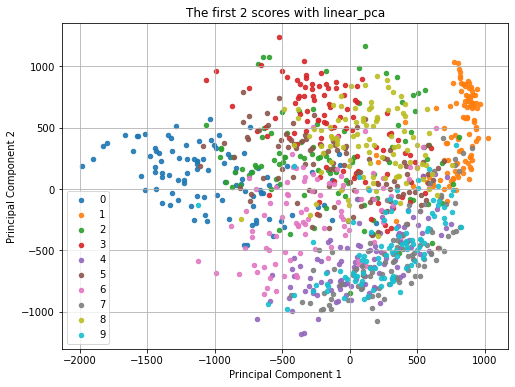

In [5]:
k = 2
S = linear_pca(X, k)
N = len(classes*sample)  # total samples 1000
num_class = len(classes)  # total classes

# First 2 principal components
PC1 = S[0, :N]
PC2 = S[1, :N]

# plot the first 2 principal components of data
plt.figure(figsize=(8,6)) 
for i in range (num_class):
    plt.scatter(PC1[100*i:100*(i+1)], PC2[100*i:100*(i+1)], c=np.array(plt.cm.tab10(i/num_class)).reshape(1,-1),
                label=classes[i][1], s=20, alpha=0.9, marker='o')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The first 2 scores with linear_pca')
plt.legend()
plt.grid()
plt.show()

#### Task 1.2
**<font>
Complete the function `gram_pca` such that it has the same functionality as `linear_pca` but expects a gram matrix $\mathbf{K}=\mathbf{X}^T\mathbf{X}$ instead of the data matrix $\mathbf{X}$ as its input. Do not assume that $\mathbf{K}$ was produced from centered data. Note: It is important to be consistent in notation here. E.g., for a data matrix of $1000$ MNIST images, we have $\mathbf{X}\in \mathbb{R}^{784 \times 1000}$ and $\mathbf{K}\in \mathbb{R}^{1000 \times 1000}$.
</font>**

In [6]:
def gram_pca(K,k):
    # K=phi(X)^T*phi(X), tilde{K}=H^T*phi(X)^T*phi(X)*H=H*K*H
    N = K.shape[0]  # 1000 sample
    I = np.identity(N)  # NxN identity/orthogonal matrix     
    H = I - np.full((N, N), 1./N)  # NxN matrix with values 1-1/N
    K_c = H @ K @ H  # centered gram matrix K
    
    # SVD of K_c and principal components. EVD: tilde{K}=V*Lambda*V^T
    [V, Lambda, VT] = np.linalg.svd(K_c, full_matrices = False) 
    Sigma = np.sqrt(Lambda)
    S = np.expand_dims(Sigma[:k], axis = 1) * VT[:k, :]
    
    return S

#### Task 1.3
**<font>[15 points] Test your implementation and show that `gram_pca(np.dot(X.T, X), k)` yields results equivalent to those of `liear_pca(X, k)`.</font>**

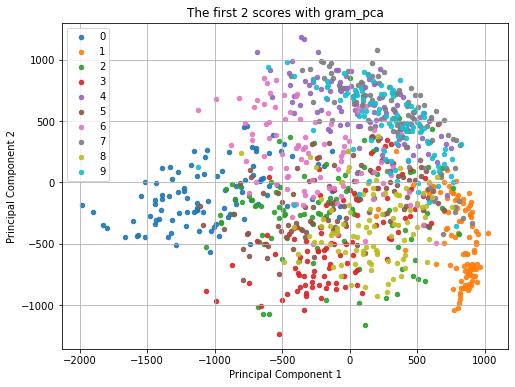

In [7]:
K = np.dot(X.T, X)  # (1000,784)(784,1000)=(1000,1000)
S_gram = gram_pca(K, k)

# get first 2 principal components via gram_pca
PC1_gram = S_gram[0, :N]
PC2_gram = S_gram[1, :N]

# plot the first 2 gram principal components of data
plt.figure(figsize=(8,6)) 
for i in range (num_class):
    plt.scatter(PC1_gram[100*i:100*(i+1)], PC2_gram[100*i:100*(i+1)], c=np.array(plt.cm.tab10(i/num_class)).reshape(1,-1),
                label=classes[i][1], s=20, alpha=0.9, marker='o')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The first 2 scores with gram_pca')
plt.legend()
plt.grid()
plt.show()

#### Task 1.4
**<font>
There is as an unknown vector space $\mathbb{H}$, equipped with an inner product $\langle . , .\rangle_{\mathbb{H}}$ and a function
</font>**

$$
\varphi : \mathbb{R}^p \rightarrow \mathbb{H},
$$

**<font>
such that
</font>**

$$
\langle \varphi(\mathbf{x}) , \varphi(\mathbf{y}) \rangle_\mathbb{H} = \exp{(-\frac{{\|\mathbf{x}-\mathbf{y}\|}^2}{2\sigma^2})}
$$

**<font>
holds for every $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$. The expression on the right-hand side of the equation is called the *Gaussian kernel* and $\sigma$ is a parameter to choose by hand.
</font>**

**<font>
The function `gaussian_kernel_pca` expects a data matrix $\mathbf{X}$, a reduced dimension number $k$ and a parameter $\sigma$. It returns the first $k$ *Kernel PCA* scores of the data. In other words, the function returns the first $k$ PCA scores of
</font>**

$$
\varphi(\mathbf{x}_1), \varphi(\mathbf{x}_2), ..., \varphi(\mathbf{x}_N),
$$

**<font>
where $\mathbf{x}_i$ denotes the $i$-th data sample/ $i$-th column of the data matrix. The function `gaussian_kernel_pca` is already written, but for it to work, the function `compute_gaussian_gram_matrix` must return correct results. Complete `compute_gaussian_gram_matrix` accordingly.</font>**

In [8]:
def compute_gaussian_gram_matrix(X, sigma):
    K = np.zeros((X.shape[1], X.shape[1]))  # (1000,1000)
    for i in range(X.shape[1]):  # 1000
        for j in range(X.shape[1]):
            x_y = X[:, i] - X[:, j]  # x-y
            K[i, j] = np.exp(-np.sum(x_y**2) / (2*(sigma**2)))  # calculation in Gaussian kernel

    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

#### Task 1.5
**<font>Test `gaussian_kernel_pca` with some MNIST train images and $\sigma = 1000$.</font>**

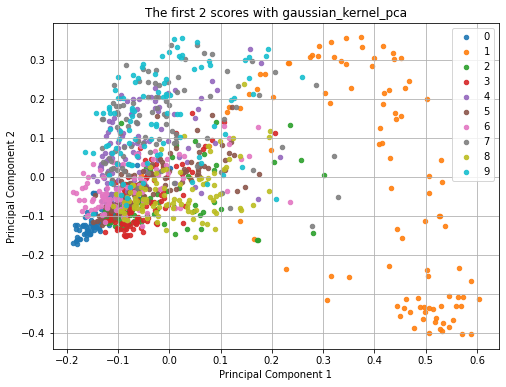

In [9]:
# Get first k principal components of data via gaussian_kernel_pca
sigma = 1000
S_gauss = gaussian_kernel_pca(X, k, sigma)

# First 2 principal components via gaussian_kernel_pca
PC1_gauss = S_gauss[0, :N]
PC2_gauss = S_gauss[1, :N]

# plot the first 2 gaussian-kernel principal components of data
plt.figure(figsize=(8,6)) 
for i in range (num_class):
    plt.scatter(PC1_gauss[100*i:100*(i+1)], PC2_gauss[100*i:100*(i+1)], c=np.array(plt.cm.tab10(i/num_class)).reshape(1,-1),
                label=classes[i][1], s=20, alpha=0.9, marker='o')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('The first 2 scores with gaussian_kernel_pca')
plt.legend()
plt.grid()
plt.show()